In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_excel(r"C:\Users\Edwin\Desktop\101020\test1.xlsx", sheet_name= 'Sheet2')

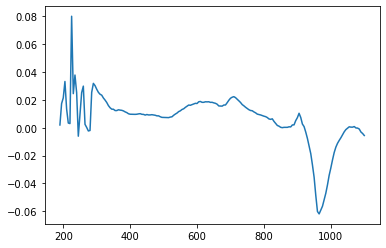

In [21]:
x = df['X4']
y = df['Y5']
plt.plot(x,y)

In [24]:
import xmltodict

xmlDict = xmltodict.parse(r"C:\Users\Edwin\Desktop\101020\Edwin\Rescan\S1_Ouzo_NS_txt.xml")

ExpatError: not well-formed (invalid token): line 1, column 2